<a href="https://colab.research.google.com/github/ntp3105/IISc-CCE-ML-AI-MLOps/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical AI and MLOps : Assignment 2

I have used Jupyterlab for the assignment. The export method of csv file dependent on my local storage has changed.

### Download the datasets.

The datasets are downloaded and stored in pandas dataframes `df1` and `df2`. You are free to change the names as you like. You can split the datasets using `train_test_split` function from the `scikit-learn` library.

**1st dataset:** (df1) For problems 1, 2, 3 and 4

**2nd dataset:** (df2) For problem 5

In [472]:
# DO NOT EDIT

#!pip install gdown
#!gdown 18NuvJotUFiTAHW0YgaoLVu2blW_V6YX0
#!unzip -o /content/assignment2.zip -d data

import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder
from sklearn import tree


df1 = pd.read_csv('assignment2-1.csv')
df2 = pd.read_csv('assignment2-2.csv')

print("Done")

Done


## Problem and Dataset Description

You have been provided with a dataset containing various attributes about the behavior of an online shopper and whether they made a purchase or not. Your task is to build a decision tree model to predict whether a visitor to the webpage actually made a purchase or not based on the provided attributes.

Dataset columns:

*   Electronic_Devices : the number of pages of electronic devices visited by the shopper in a session
*   Electronic_Devices_Duration : the total time spent in electronic devices category by the shopper
*   Groceries : the number of pages of groceries visited by the shopper
*   Groceries_Duration : the total time spent in groceries category by the shopper
*   Sports_Equipments : the number of pages of sports equipments visited by the shopper
*   Sports_Equipments_Duration : the total time spent in sports equipments category by the shopper
*   Bounce_Rates : this feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests
*   Special_Day : this feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Independence Day)
*   Month : the specific month of the year
*   Browser : the browser used by the shopper
*   Region : the region where the searches were made
*   Type_of_visitor : this feature indicates whether the shopper is a returning or new visitor to the page
*   Weekend : Boolean value indicating whether the date of the visit is weekend
*   Purchase_made : Boolean value indicating whether the purchase was made or not

In [63]:
df1.head(5)

,ElectronicDevices,ElectronicDevices_Duration,Groceries,Groceries_Duration,SportsRelated,Sports_Equipments_Duration,Bounce_Rates,Special_Day,Month,Browser,Region,Type_of_visitor,Weekend,Purchase_made
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,May,Mozilla,1,Old_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.0,May,Edge,1,Old_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,May,Mozilla,9,Old_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.0,May,Edge,2,Old_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.0,May,Opera,1,Old_Visitor,True,False


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ElectronicDevices           2004 non-null   int64  
 1   ElectronicDevices_Duration  2004 non-null   float64
 2   Groceries                   2004 non-null   int64  
 3   Groceries_Duration          2004 non-null   float64
 4   SportsRelated               2004 non-null   int64  
 5   Sports_Equipments_Duration  2004 non-null   float64
 6   Bounce_Rates                2004 non-null   float64
 7   Special_Day                 2004 non-null   float64
 8   Month                       2004 non-null   object 
 9   Browser                     2004 non-null   object 
 10  Region                      2004 non-null   int64  
 11  Type_of_visitor             2004 non-null   object 
 12  Weekend                     2004 non-null   bool   
 13  Purchase_made               2004 

In [10]:
df1.describe()

,ElectronicDevices,ElectronicDevices_Duration,Groceries,Groceries_Duration,SportsRelated,Sports_Equipments_Duration,Bounce_Rates,Special_Day,Region
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,1.751497,66.499439,0.379741,27.354991,18.888723,778.563731,0.024014,0.021457,2.992515
std,2.769047,169.448040,1.154993,114.582470,22.576195,1099.510902,0.054974,0.116183,2.338641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,118.625000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,12.000000,413.400000,0.000000,0.000000,2.000000
75%,3.000000,63.000000,0.000000,0.000000,25.000000,1039.129167,0.014286,0.000000,4.000000
max,24.000000,2047.234848,16.000000,1467.000000,328.000000,12983.787710,0.200000,1.000000,9.000000


In [24]:
df1['Purchase_made'].value_counts()

Purchase_made
False    1824
True      180
Name: count, dtype: int64

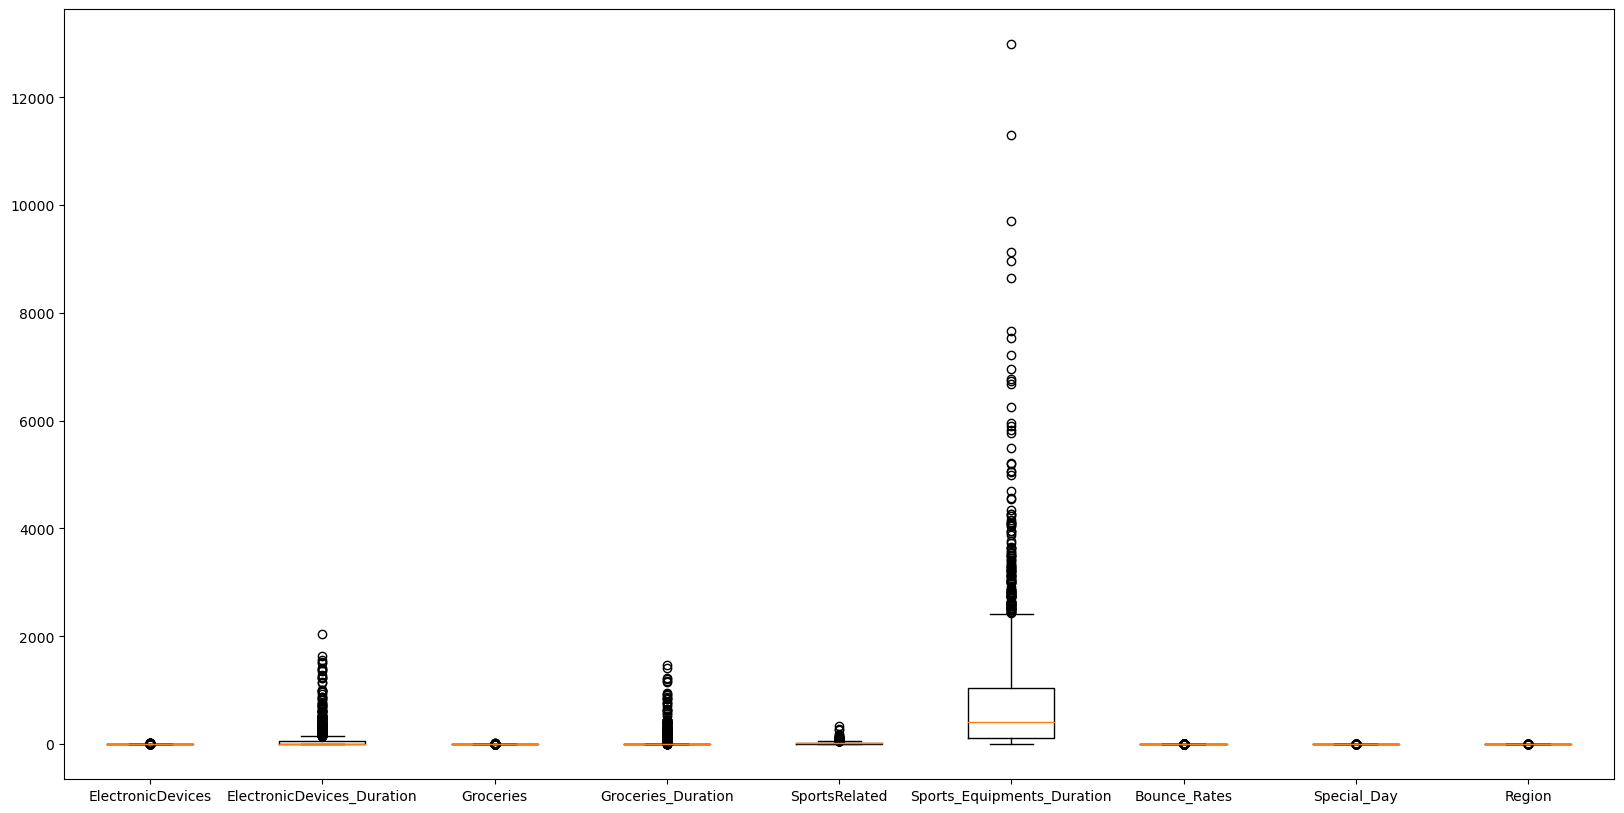

In [53]:
numerical_cols = df1.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(20,10))
plt.boxplot(numerical_cols)
plt.xticks(range(1, len(numerical_cols.columns) + 1), numerical_cols.columns);

## Problem 1: Decision Tree (2 Marks)


1.   Using the provided dataset, build a decision tree model that can predict whether a visitor will make a purchase during their online session. Additionally, evaluate the performance of your decision tree model using appropriate metrics such as accuracy, precision, recall, and F1-score.
2.   Which attribute(s) did your decision tree identify as the most important for predicting whether a visitor will make a purchase or not?
3.   What is the maximum depth of your decision tree and how did you estimate it?
4.   What is the accuracy of your decision tree model in predicting purchase behavior, and did you employ any techniques to handle categorical features or missing values in the dataset?





### My EDA (Exploratory Data Analysis)

1) There are no null values in any column
2) Datatypes are consistent with columns' nature
3) There seems to be no categorical columns that are high cardinal/redundant, no leakage
4) But there is apparently class imbalance, because 1824 False class and 180 True class. So, optionally, load balancing will be done to analyse its effect on accuracy

## 1st Answer

In [473]:
### Write your code and answers here

# Creating feature matrix, X and target vector, y
X = df1.drop(columns = 'Purchase_made')
y = df1['Purchase_made']

# Splitting in training and testing dataset (4:1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3 )

# Build decision tree Model
model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(random_state = 42)
        )

In [474]:
# Fit decision tree  model to training data
model.fit(X_train, y_train)

# Finding metric scores for training data
accuracy_score_train  = accuracy_score(y_train, model.predict(X_train))
precision_score_train = precision_score(y_train, model.predict(X_train))
recall_score_train    = recall_score(y_train, model.predict(X_train))
f1_score_train        = f1_score(y_train, model.predict(X_train))

# Printing metric scores for test data
print(f"For training data, accuracy_score is {accuracy_score_train}")
print(f"For training data, precision_score is {precision_score_train}")
print(f"For training data, recall_score is {recall_score_train}")
print(f"For training data, f1_score is {f1_score_train}")

For training data, accuracy_score is 1.0
For training data, precision_score is 1.0
For training data, recall_score is 1.0
For training data, f1_score is 1.0


In [475]:
# Make predictions on the test data
y_pred = model.predict(X_test)

#Calculate the metrics for test data
accuracy_score_test =  accuracy_score(y_test, y_pred)
precision_score_test = precision_score(y_test, y_pred)
recall_score_test    = recall_score(y_test, y_pred)
f1_score_test        = f1_score(y_test, y_pred)

# Printing metric scores for test data
print(f"For test data, accuracy_score is {accuracy_score_test}")
print(f"For test data, precision_score is {precision_score_test}")
print(f"For test data, recall_score is {recall_score_test}")
print(f"For test data, f1_score is {f1_score_test}")

For test data, accuracy_score is 0.830423940149626
For test data, precision_score is 0.17073170731707318
For test data, recall_score is 0.17073170731707318
For test data, f1_score is 0.17073170731707318


In [476]:
#To get the total depth of the Decision tree fixed
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 23


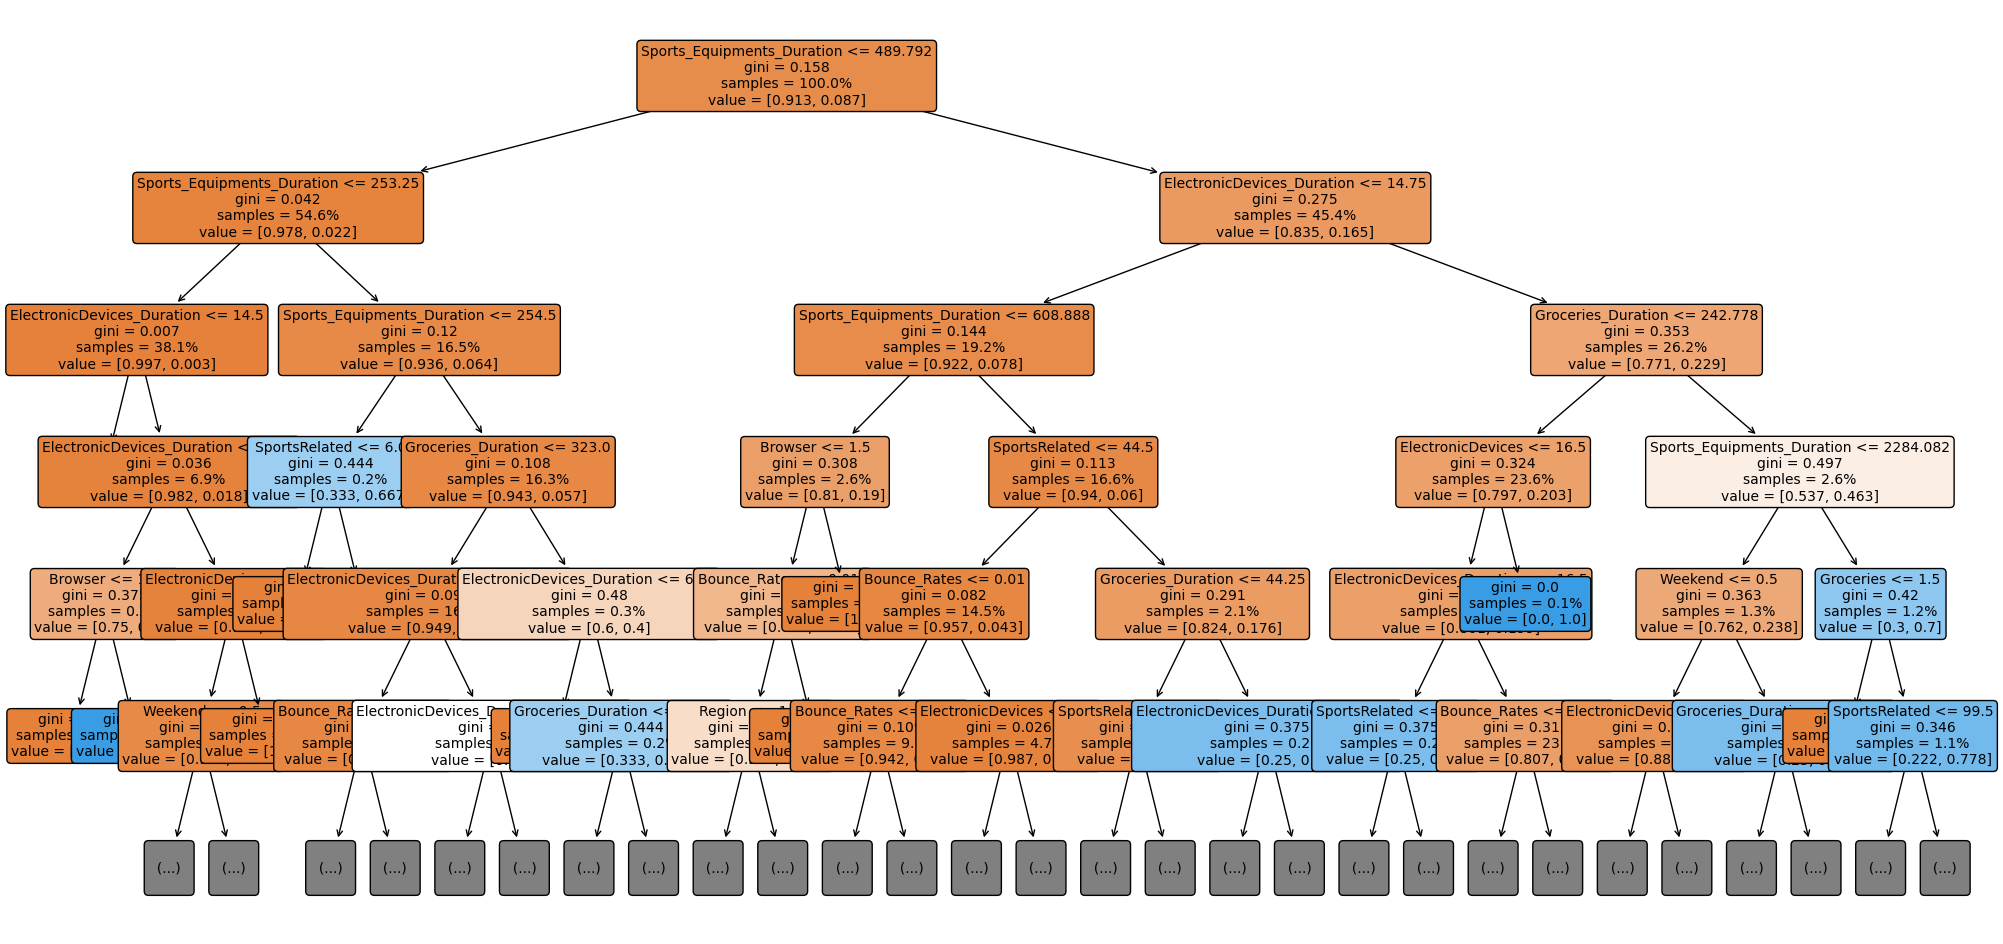

In [478]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree = model.named_steps["decisiontreeclassifier"],
    feature_names= list(X_train.columns),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=1,  # Display proportion of classes in leaf
    max_depth=5,  # Only display first 3 levels
    fontsize=10,  # Enlarge font
    ax=ax,  # Place in figure axis
);

## 2nd Answer
The Decision tree decided Spors equipments duration as the most important deature, followed by Electronic Devices duration, and  Groceries duration. 

## 3rd Answer
By performing pre-pruning on decision tree like optimising the max depth of the leaves, minimum samples in leaf before splitting and minimum sample left before it stops splititng are three parameters.

In [151]:
#performing hyperparamter tuning for max depth of decision tress 
#param_grid = {"decisiontreeclassifier__max_depth": range(1, 15)}
param_grid = {
    'decisiontreeclassifier__max_depth': [1,2,3,4,5,6,7,8,9,10,12,13,14,15],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training  data
grid_search.fit(X_train, y_train)  

# Get the best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("best_parameter:",best_params)
print("Corresponding accuracy score:",best_score)

best_parameter: {'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 10}
Corresponding accuracy score: 0.9139135514018693


In [155]:
# Build Model
model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth= 2, min_samples_leaf = 1, min_samples_split = 10, random_state =5)
        )
# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Finding metric scores
accuracy_score_test =  accuracy_score(y_test, y_pred)
print(f"For test data, accuracy_score is {accuracy_score_test}")

For test data, accuracy_score is 0.8977556109725686


## 4th Answer

Accuracy after pre-pruning is 0.89, while before was 0.83. There were no missing values, but if there were, imputation based on mean,, median or interpolation would be employed based on the dataset column which has missing data.
Handled categorical datasets by adding Ordinal Encoded in pipeline imported from category_encoders

## Problem 2: Random Forest (1 mark)


1.   Implement a Random Forest classifier with a specified number of trees (e.g., 100 trees).Train the Random Forest classifier on the training data.
2.   Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score) on the testing data.

In [250]:
### Write your code and answers here

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 trees
n_trees = 100
rf_classifier = make_pipeline(
        OrdinalEncoder(),
       # StandardScaler(),
        RandomForestClassifier(n_estimators=n_trees, random_state=42)
        )

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)


# Fit model to training data
rf_classifier.fit(X_train, y_train)

#Predict the target values from the rf_classifier model
y_train_pred = rf_classifier.predict(X_train)

# Finding metric scores for training data
accuracy_score_train  = accuracy_score(y_train, y_train_pred)
precision_score_train = precision_score(y_train, y_train_pred)
recall_score_train    = recall_score(y_train, y_train_pred)
f1_score_train        = f1_score(y_train, y_train_pred)

print(f"For training data, accuracy_score is {accuracy_score_train}")
print(f"For training data, precision_score is {precision_score_train}")
print(f"For training data, recall_score is {recall_score_train}")
print(f"For training data, f1_score is {f1_score_train}")

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Finding metric scores for test data
accuracy_score_test =  accuracy_score(y_test, y_pred)
precision_score_test = precision_score(y_test, y_pred, zero_division = 1)
recall_score_test    = recall_score(y_test, y_pred)
f1_score_test        = f1_score(y_test, y_pred)

print("******************************************************")
print(f"For test data, accuracy_score is {accuracy_score_test}")
print(f"For test data, precision_score is {precision_score_test}")
print(f"For test data, recall_score is {recall_score_test}")
print(f"For test data, f1_score is {f1_score_test}")

For training data, accuracy_score is 0.9993761696818465
For training data, precision_score is 1.0
For training data, recall_score is 0.9928057553956835
For training data, f1_score is 0.996389891696751
******************************************************
For test data, accuracy_score is 0.8952618453865336
For test data, precision_score is 0.3333333333333333
For test data, recall_score is 0.024390243902439025
For test data, f1_score is 0.04545454545454545


## Problem 3: Bagging with Pruning (1 mark)



1.   Define the mathematical criterion for pruning a decision tree within the Bagging with Pruning ensemble. Explain how this criterion helps prevent overfitting.
2.   When applying bagging with pruning to decision trees in the dataset, how do you decide when to prune a branch or subtree in each individual tree, and how does this ensemble approach help reduce overfitting compared to a single decision tree?



### Answer 1

The mathematical criterion for pruning in Bagging is for optimising the Ensemble model so it doesnt overfit or underfit. The criterion determine when and how to trim branches (subtrees) of the decision tree to prevent overfitting.
There are two types of pruning:  
1) **Pre-pruning** 
    
2) **Post-pruning**

Here are the key differences between them:

1. **Timing of Pruning**:

    <u>Pre-pruning</u>: Pre-pruning, also known as early stopping, involves setting stopping conditions before constructing the entire decision tree. It stops the tree from growing too deep or splitting too many nodes based on certain criteria during the tree-building process.

    <u>Post-pruning</u>: Post-pruning, also known as tree pruning or cost-complexity pruning, involves constructing a full decision tree first and then selectively removing branches or subtrees after the tree is built. Pruning decisions are made based on criteria that assess the quality of the tree's branches.
    
    
2. **Criteria for Pruning**:

    <u>Pre-pruning</u>: Pre-pruning typically uses criteria like maximum depth, minimum samples per leaf, minimum samples per split, or maximum number of leaf nodes as stopping conditions. The tree stops growing when these conditions are met.

   <u> Post-pruning</u>: Post-pruning uses the mathematical criteria like the **Cost-Complexity Pruning (CCP) criterion**, which assesses the quality of each subtree based on impurity reduction and subtree size. Subtrees with a high CCP score (i.e., high impurity reduction relative to subtree size) are pruned.
   
The CCP criterion introduces a penalty term for the complexity of the tree while considering its accuracy on the training data. It aims to find the optimal trade-off between tree complexity and model accuracy. The mathematical formulation of the CCP criterion is as follows:

                              CCP(T) = Impurity(T) + α * |Leave
                              
- `CCP(T)`: The cost-complexity score of tree T.
- `Impurity(T)`: A measure of impurity or error in the terminal nodes (leaves) of the tree T. Common impurity measures include Gini impurity or cross-entropy for classification tasks and mean squared error for regression tasks.
- `|Leaves(T)|`: The number of terminal nodes (leaves) in tree T.
- `α`: A non-negative hyperparameter that controls the trade-off between minimizing impurity and minimizing the complexity of the tree.

### Answer 2

When applying pruning to the branches in the dataset, we prune the nodes with low CCP. Starting from the leaves and moving upwards to the root, nodes with low CCP values are pruned. The exact threshold for pruning is determined by cross-validation or another validation technique. Typically, nodes with a CCP value below a certain threshold are pruned, while nodes with higher CCP values are retained.

How Pruning Helps Prevent Overfitting:
The CCP criterion helps prevent overfitting in the following ways:

1. **Complexity Penalty**: The term α * |Leaves(T)| introduces a penalty for having too many leaves (overly complex tree). By increasing α, you encourage the tree to have fewer leaves, resulting in a simpler tree.

2. **Trade-off**: The CCP criterion provides a trade-off between reducing impurity (training error) and minimizing tree complexity. As α varies, the criterion allows you to explore different points along this trade-off curve.

3. **Optimal Subtree**: Pruning works by finding the subtree of the original tree that minimizes the CCP score. This subtree is considered the optimal trade-off between accuracy and complexity.

4. **Generalization**: A pruned tree is less likely to fit noise or idiosyncrasies in the training data, making it more likely to generalize well to unseen data.

5. **Avoiding Overfitting**: By reducing the complexity of the tree, pruning helps prevent overfitting. Overfitting occurs when a tree captures noise or specific patterns in the training data that do not generalize to new data. Pruning removes unnecessary splits and simplifies the model.

In the context of Bagging with Pruning, each decision tree in the ensemble is grown to some depth (possibly overfitting the data), and then pruning is applied to control their complexity. The ensemble of pruned trees combines their predictions, providing a more robust and less overfit model compared to individual trees.

In summary, the mathematical criterion for pruning decision trees, such as the CCP criterion, helps prevent overfitting by balancing the trade-off between accuracy and model complexity. Pruning removes unnecessary branches, resulting in simpler and more generalizable models within the Bagging with Pruning ensemble.

## Problem 4: Boosting and XG Boost (1 mark)



1.   Implement an AdaBoost classifier with a specified number of weak learners. You can use Skikit-learn's AdaBoost classifier. Train the AdaBoost classifier on the training data. Evaluate the model's performance using appropriate classification metrics (e.g., accuracy, precision, recall, F1-score) on the testing data.
2.   Visualize the decision boundaries of the AdaBoost model by selecting two features from the dataset and creating a 2D plot that shows how the model separates the classes.





In [391]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a weak learner which is the decision tree
base_estimator = DecisionTreeClassifier(max_depth=1)  

# Create an AdaBoostClassifier with a specified number of weak learners (n_estimators)
n_estimators = 100 

# Build AdaBoost Classifier Model

adaboost_classifier =   make_pipeline(
                        OrdinalEncoder(),
                        StandardScaler(),
                        AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators)
                        )

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(X_test)

# Finding metric scores for test data
accuracy_score_test =  accuracy_score(y_test, y_pred)
precision_score_test = precision_score(y_test, y_pred, zero_division = 1)
recall_score_test    = recall_score(y_test, y_pred)
f1_score_test        = f1_score(y_test, y_pred)

print(f"For test data, accuracy_score is {accuracy_score_test}")
print(f"For test data, precision_score is {precision_score_test}")
print(f"For test data, recall_score is {recall_score_test}")
print(f"For test data, f1_score is {f1_score_test}")

For test data, accuracy_score is 0.8877805486284289
For test data, precision_score is 0.25
For test data, recall_score is 0.04878048780487805
For test data, f1_score is 0.0816326530612245


In [392]:
X_train.head()

,ElectronicDevices,ElectronicDevices_Duration,Groceries,Groceries_Duration,SportsRelated,Sports_Equipments_Duration,Bounce_Rates,Special_Day,Month,Browser,Region,Type_of_visitor,Weekend
1481,0,0.000000,0,0.0,25,1512.523810,0.000000,0.0,Mar,Edge,3,Old_Visitor,False
87,0,0.000000,0,0.0,3,138.000000,0.000000,0.0,May,Mozilla,1,Old_Visitor,False
478,13,315.966667,1,0.0,15,406.575000,0.019048,0.0,Mar,Edge,3,Old_Visitor,False
841,0,0.000000,0,0.0,6,203.150000,0.000000,0.0,Mar,Edge,7,Old_Visitor,False
550,2,16.666667,0,0.0,22,343.369048,0.001299,0.0,Mar,Edge,1,Old_Visitor,False


C:\Users\PTB3KOR\.conda\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


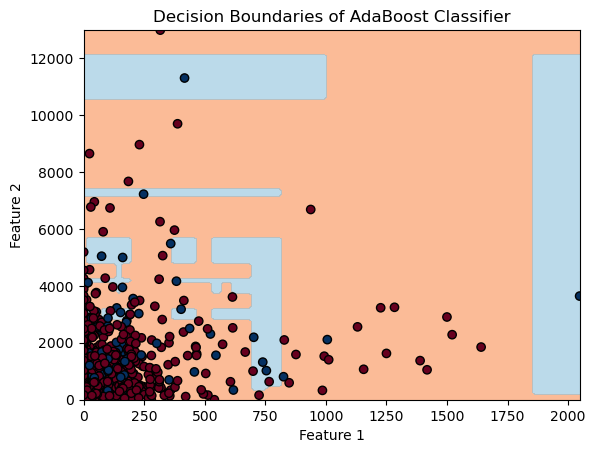

In [402]:
X = X_train[['ElectronicDevices_Duration', 'Sports_Equipments_Duration']]
y = y_train

# Creating a meshgrid for visualization
xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min()-0.1, X.iloc[:, 0].max()+0.1, 100),
                     np.linspace(X.iloc[:, 1].min()-0.1, X.iloc[:, 1].max()+0.1, 100))

# Create an AdaBoostClassifier with a specified number of weak learners (n_estimators)
n_estimators = 100 

# Build AdaBoost Classifier Model

adaboost_classifier =   make_pipeline(
                        OrdinalEncoder(),
                        StandardScaler(),
                        AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators)
                        )

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X, y)
# Predict the class labels for each point in the meshgrid
Z = adaboost_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Scatter plot of the data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of AdaBoost Classifier')
plt.show()


# Problem 5: Unsupervised Learning (5 marks)

You are given a dataset, which contains sensor data. Your task is to apply dimensionality reduction and clustering techniques on this dataset using Principal Component Analysis (PCA), K-means, and Linear Discriminant Analysis (LDA).



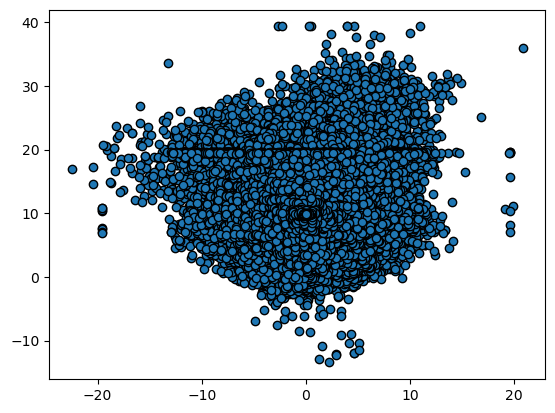

In [481]:
plt.scatter(df2['y'], df2['z'], edgecolors='k');

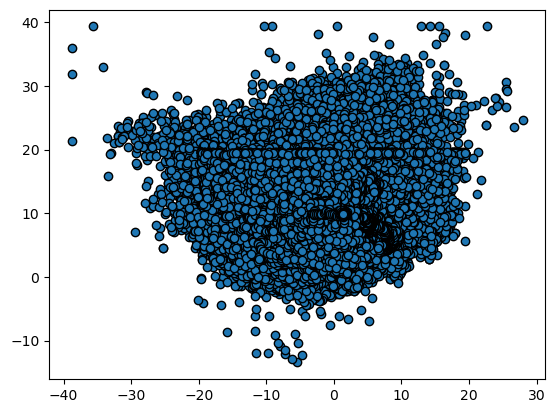

In [482]:
plt.scatter(df2['x'], df2['z'], edgecolors='k');

## Part 1: PCA (1 mark)
**a.** Apply PCA to reduce the dimensionality of the dataset.

**b.** Calculate the percentage of variance explained by each principal component.

**c.** Plot a scree plot to visualize the percentage of variance explained by each principal component.

**d.** Discuss the importance of dimensionality reduction using PCA in the context of the HAR dataset.



**Incremental principal component analysis (IPCA)** will be used. It is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

## Answer a

In [406]:
from sklearn.decomposition import PCA, IncrementalPCA
n_components = 2
X = df2[['x', 'y', 'z']]

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of components needed to retain
n_components = 2

# Create an Incremental PCA object
ipca = IncrementalPCA(n_components=n_components)

# Process data in batches or subsets
batch_size = 1000 
for batch_start in range(0, len(X_scaled), batch_size):
    batch_data = X_scaled[batch_start:batch_start + batch_size]
    ipca.partial_fit(batch_data)

# Transform the entire dataset using IPCA
transformed_X= ipca.transform(X_scaled)


In [407]:
print("X:",X.shape)
print("transformed_X:",transformed_X.shape)
transformed_X[0:3]

X: (13062475, 3)
transformed_X: (13062475, 2)


array([[-0.6416667 , -0.97513151],
       [-0.63769244, -0.96898795],
       [-0.66205138, -0.94786417]])

### Finding explained variance ratio for n_components = 2

## Answer b

In [224]:
import numpy as np
# Calculate the explained variance ratio for n_components = 2
explained_variance_ratio = ipca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for PC{i + 1}: {ratio:.4f}")

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the cumulative explained variance ratio
print("Cumulative Explained Variance Ratios:")
for i, cumulative_ratio in enumerate(cumulative_explained_variance_ratio):
    print(f"PC{i + 1}: {cumulative_ratio:.4f}")

Explained Variance Ratio for PC1: 0.3740
Explained Variance Ratio for PC2: 0.3069
Cumulative Explained Variance Ratios:
PC1: 0.3740
PC2: 0.6809


### Finding explained variance ratio for n_components = 3

In [218]:
# Calculate the explained variance ratio for n_components = 3
'''explained_variance_ratio = ipca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for PC{i + 1}: {ratio:.4f}")

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the cumulative explained variance ratio
print("Cumulative Explained Variance Ratios:")
for i, cumulative_ratio in enumerate(cumulative_explained_variance_ratio):
    print(f"PC{i + 1}: {cumulative_ratio:.4f}")

Explained Variance Ratio for PC1: 0.3777
Explained Variance Ratio for PC2: 0.3361
Explained Variance Ratio for PC3: 0.2862
Cumulative Explained Variance Ratios:
PC1: 0.3777
PC2: 0.7138
PC3: 1.0000


### Finding explained variance ratio for n_components = 1

In [221]:
# Calculate the explained variance ratio for n_components = 1
'''
explained_variance_ratio = ipca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for PC{i + 1}: {ratio:.4f}")
    
# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the cumulative explained variance ratio
print("Cumulative Explained Variance Ratios:")
for i, cumulative_ratio in enumerate(cumulative_explained_variance_ratio):
    print(f"PC{i + 1}: {cumulative_ratio:.4f}")

'''

Explained Variance Ratio for PC1: 0.3356
Cumulative Explained Variance Ratios:
PC1: 0.3356


## Answer c

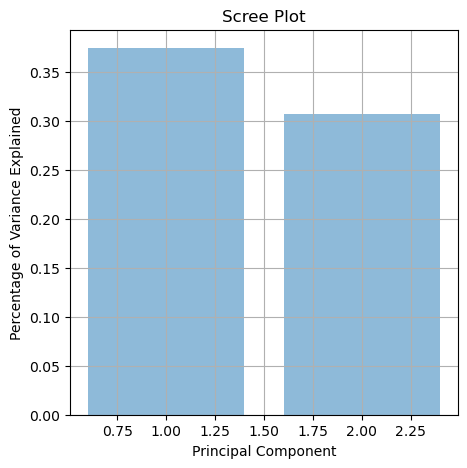

In [225]:
# Create a scree plot for the explained variance ratio for n_components = 2
'''A scree plot is a visual representation of the percentage of variance explained by each principal component in PCA. 
'''
plt.figure(figsize=(5, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Scree Plot')
plt.grid()
plt.show()

## Answer d

Dimensionality reduction using Principal Component Analysis (PCA) can be crucial in the context of the HAR (Human Activity Recognition) dataset for several reasons:

1. **Curse of Dimensionality**: The HAR dataset may contain a large number of features (accelerometer and gyroscope sensor readings) for each observation. High-dimensional datasets are often prone to the "curse of dimensionality," which can lead to increased computational complexity and model overfitting. PCA can help reduce dimensionality and mitigate these issues.

2. **Noise Reduction**: In sensor data, there may be noise or irrelevant features that do not contribute significantly to the recognition of human activities. By reducing the dimensionality, PCA can filter out noise and retain only the most relevant information, improving the signal-to-noise ratio.

3. **Visualization**: High-dimensional data is challenging to visualize, making it difficult to gain insights into the underlying patterns. PCA allows you to project the data into a lower-dimensional space (e.g., two or three dimensions), enabling easier visualization and exploration of the data.

4. **Improved Model Performance**: High dimensionality can lead to overfitting, especially if the number of observations is limited. Reducing the number of features through PCA can help prevent overfitting and improve the generalization ability of machine learning models.

5. **Feature Interpretability**: After dimensionality reduction, the principal components (newly created features) can often be more interpretable than the original features. This can lead to a better understanding of the relationships between variables.

6. **Computational Efficiency**: Lower-dimensional data is computationally more efficient to work with. Training machine learning models on reduced-dimensional data can save time and resources.

7. **Collinearity Mitigation**: In sensor data, there can be collinearity between sensor readings due to sensor placement or physical constraints. PCA can reduce the collinearity among features, which can lead to more stable and interpretable models.

8. **Feature Engineering**: The principal components generated by PCA can serve as new features that capture the most important variations in the data. These components can be used as inputs for machine learning models and may lead to better model performance.

In summary, dimensionality reduction using PCA is valuable in the context of the HAR dataset as it helps address issues related to high dimensionality, noise, overfitting, and model interpretability. It can lead to improved model performance and a better understanding of the underlying patterns in human activity recognition.

##

# ------------------------------------------------------------------------------------------------------------

#









## Part 2: K-means (2 marks)
**a.** Apply K-means clustering on the reduced-dimensional dataset obtained from PCA.

**b.** Use the elbow method to determine the optimal number of clusters.

**c.** Visualize and interpret the results of the K-means clustering.

**d.** Evaluate the quality of the clustering solution using appropriate metrics such as silhouette score or within-cluster sum of squares.

 Since the dataset is very large, I will combine the **elbow method** with **Mini-Batch K-Means clustering** to determine the optimal number of clusters for the dataset. The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

## Answer a

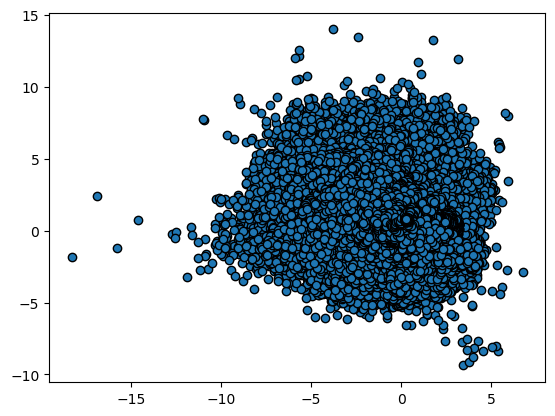

In [483]:
transformed_X = pd.DataFrame(transformed_X)
plt.scatter(transformed_X[0],transformed_X[1], edgecolors='k');

In [484]:
from sklearn.cluster import MiniBatchKMeans
KMeans_X = transformed_X   
KMeans_X.head()

,0,1
0,-0.641667,-0.975132
1,-0.637692,-0.968988
2,-0.662051,-0.947864
3,-0.634631,-0.972099
4,-0.639339,-0.966683


## Answer b

### Applying elbow method for MiniBatchKMeans

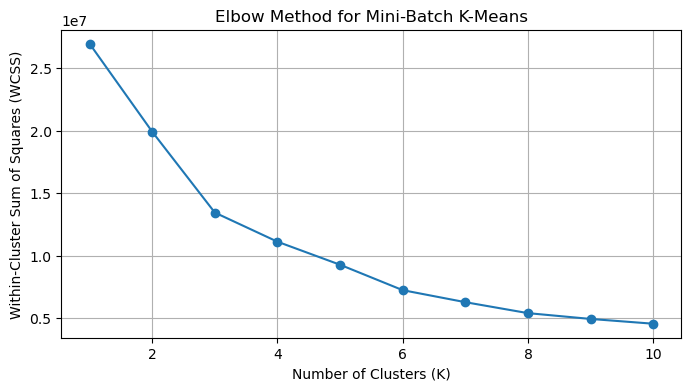

In [485]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS) values
wcss = []

# Specify a range of cluster, K values 
k_values = range(1, 11)

# Calculate WCSS for each K value
for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=43, batch_size= 2000, n_init= "auto")
    kmeans.fit(KMeans_X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the WCSS values for different K values
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Mini-Batch K-Means')
plt.grid()
plt.show()

### Applying elbow method for KMeans

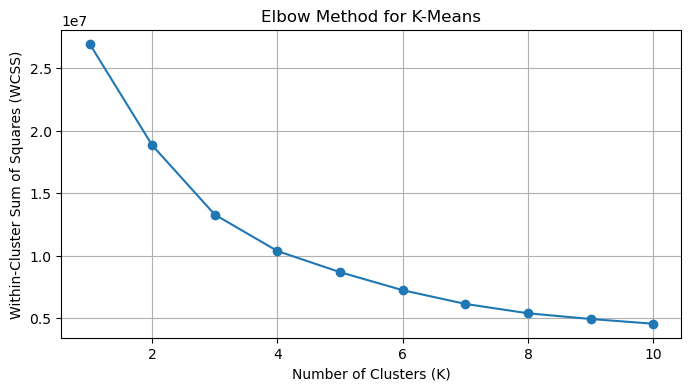

In [486]:
from sklearn.cluster import KMeans

# Initialize an empty list to store the within-cluster sum of squares (WCSS) values
wcss = []

# Specify a range of cluster, K valcues
k_values = range(1, 11)

# Calculate WCSS for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=43, n_init= "auto")
    kmeans.fit(KMeans_X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the WCSS values for different K values

plt.figure(figsize=(8, 4))

plt.plot(k_values, wcss, marker='o', linestyle='-')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for K-Means')

plt.grid()

plt.show()

## Proceeding with MiniBatchKMeans

In [301]:
KMeans_X = transformed_X 

# Fit the clustering model with n_clusters=5
kmeans_5 = MiniBatchKMeans(n_clusters=5, random_state=43, batch_size= 2000, n_init= "auto")
kmeans_5.fit(KMeans_X)
KMeans_X= kmeans_5.transform(KMeans_X)
KMeans_X = pd.DataFrame(KMeans_X)

# Get labels and cluster centroids
labels = kmeans_5.labels_
centroids = kmeans_5.cluster_centers_


print("labels:", labels)
print("centroids:",centroids)

labels: [2 2 2 ... 4 4 4]
centroids: [[-0.78549939  0.83267385]
 [ 0.48883552 -1.16651671]
 [-0.7069162  -0.61694477]
 [ 2.66925768  0.23352854]
 [ 0.54687828  0.59885934]]


## Answer c

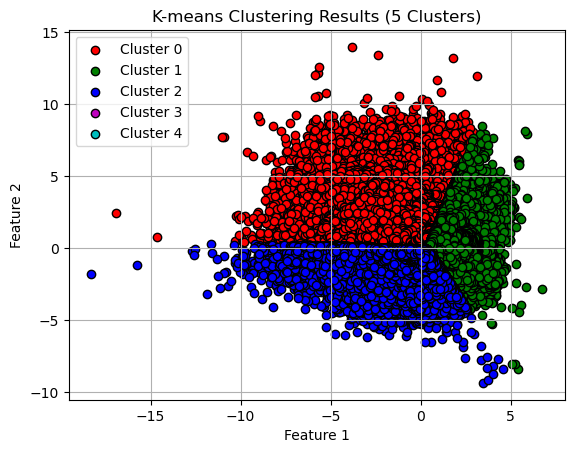

In [487]:
# Define colors for each cluster
colors = np.array(['r', 'g', 'b', 'm', 'c'])

# Create a scatter plot for each cluster
for cluster_num in range(5):
    # Extract data points belonging to the cluster
    cluster_data = transformed_X[labels == cluster_num]
    
    # Plot the data points with the corresponding color for the cluster
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], c=colors[cluster_num], label=f'Cluster {cluster_num}', edgecolors='k')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results (5 Clusters)')

# Add a legend
plt.legend()

# Add a grid
plt.grid()

#Show the plot
plt.show()

## Answer d

In [488]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(KMeans_X, labels, metric='euclidean', sample_size=100000, random_state=42)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3387635556155718


## Part 3: LDA (2 marks)
**a.** Apply LDA to project the dataset onto a lower-dimensional space that maximizes class separability.

**b.** Perform K-means clustering on the reduced-dimensional dataset obtained from LDA.

**c.** Compare the clustering results obtained from LDA with the results obtained from PCA and discuss the differences.

**d.** Evaluate the effectiveness of LDA in improving the clustering performance compared to PCA.

**Note:** You can use any libraries of your choice to implement PCA, K-means, and LDA on the UCI HAR Dataset. Provide code snippets, visualizations, and detailed explanations to support your answers. Consider discussing the interpretability of the reduced-dimensional space, the impact of different clustering parameters, and any challenges encountered during the analysis.

## Answer a

In [489]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Declare the dataset X and corresponding class labels y
X = transformed_X
y = labels

# To check if the lengths of X and y are same else will get wrong results 
assert len(X) == len(y), "Lengths of variables are not the same. Exiting."

# Initialize the LDA model with number of columns to be retained 
lda = LinearDiscriminantAnalysis(n_components=1)  

# Fit the LDA model to X and y data
X_lda = lda.fit_transform(X, y)

## Answer b

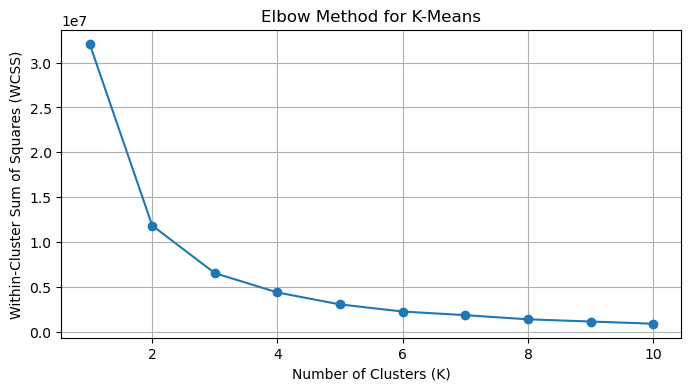

In [490]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS) values
wcss = []

# Specify a range of cluster, K values for hyperparameter tuning
k_values = range(1, 11)

# Calculate WCSS for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=43, n_init= "auto")
    kmeans.fit(X_lda)
    wcss.append(kmeans.inertia_) 

# Plot the WCSS values for different K values, ie Elbow method
plt.figure(figsize=(8, 4))

plt.plot(k_values, wcss, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for K-Means')

# Add a grid
plt.grid()

# Show the plot
plt.show()

## Answer b

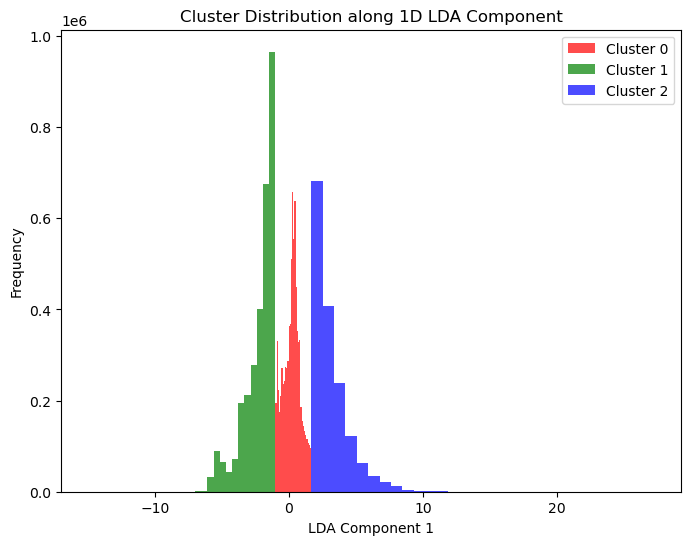

In [449]:
# Specify the number of clusters (K)
K = 3

# Create a K-means clustering model
kmeans = KMeans(n_clusters=K, random_state=42, n_init= "auto")

# Fit the model to the reduced-dimensional dataset from PCA operation
kmeans.fit(X_lda)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Visualize the clustering results

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']  # You can customize colors for different clusters

for cluster_num, color in enumerate(colors):
    cluster_data = X_lda[cluster_labels == cluster_num]
    plt.hist(cluster_data, bins=30, label=f'Cluster {cluster_num}', color=color, alpha=0.7)

# Set labels and title
plt.xlabel('LDA Component 1')
plt.ylabel('Frequency')
plt.title('Cluster Distribution along 1D LDA Component')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Answer c

In [470]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(KMeansLDA2_X, labels, metric='euclidean', sample_size=100000, random_state=42)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3050402092533127


The Silhouette Score from LDA with Kmeans is 0.305 and from PCA with Kmeans is 0.338. So PCA gives better cluster, though barely. 

**Silhouette Score**:
   - Measures how similar each data point in one cluster is to the data points in the neighboring clusters.
   - Ranges from -1 to 1:
     - A high positive value (close to 1) indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters, suggesting a good cluster.
     - **A value near 0 suggests that the data point is on or very close to the decision boundary between two neighboring clusters**.
     - A negative value (close to -1) indicates that the data point is likely placed in the wrong cluster.
   - Higher Silhouette Scores generally indicate better-defined clusters.

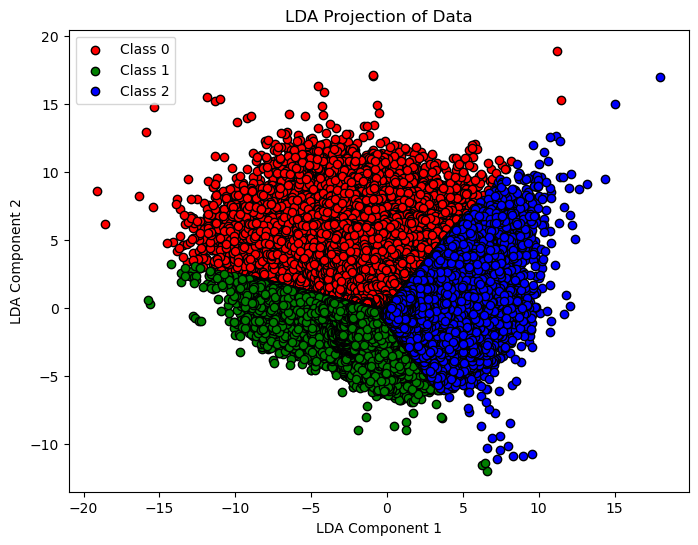

In [492]:
# Declare the dataset X and corresponding class labels y
X = transformed_X
y = labels

# Check if the lengths of variable1 and variable2 are the same
assert len(X) == len(y), "Lengths of variables are not the same. Exiting."

# Initialize the LDA model
lda_2 = LinearDiscriminantAnalysis(n_components=2)  

# Fit the LDA model to your data
X_lda_2 = lda_2.fit_transform(X, y)

# Create a scatter plot of the transformed data points
plt.figure(figsize=(8, 6))
colors = np.array(['r', 'g', 'b', 'm', 'c'])

for label, color in zip(set(y), colors):
    plt.scatter(X_lda_2[y == label, 0], X_lda_2[y == label, 1], label=f'Class {label}', color=color, edgecolors='k')

# Set labels and title
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [493]:
KMeansLDA2_X = transformed_X 

# Fit the clustering model with n_clusters=5
KMeansLDA2 = MiniBatchKMeans(n_clusters=3, random_state=43, batch_size= 2000, n_init= "auto")
KMeansLDA2.fit(KMeansLDA2_X)
KMeansLDA2_X= KMeansLDA2.transform(KMeansLDA2_X)
KMeansLDA2_X = pd.DataFrame(KMeansLDA2_X)

# Get labels and cluster centroids
labels = KMeansLDA2.labels_
centroids = KMeansLDA2.cluster_centers_
print("labels:", labels)
print("centroids:",centroids)

labels: [2 2 2 ... 0 0 0]
centroids: [[-0.34403943  0.71367589]
 [ 1.42007798  0.15065147]
 [-0.41890284 -0.8420477 ]]


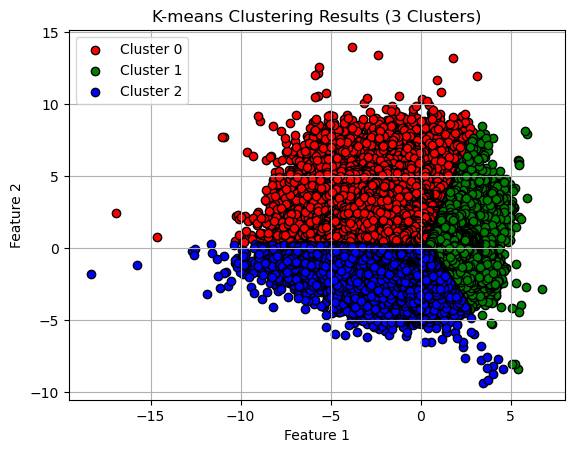

In [495]:
# Define colors for each cluster (you can customize these)
colors = np.array(['r', 'g', 'b'])

# Create a scatter plot for each cluster
for cluster_num in range(3):
    # Extract data points belonging to the current cluster
    cluster_data = transformed_X[labels == cluster_num]
    
    # Plot the data points with the corresponding color for the current cluster
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], c=colors[cluster_num], label=f'Cluster {cluster_num}', edgecolors='k')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results (3 Clusters)')
plt.legend()
plt.grid()
plt.show()

In [469]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(KMeansLDA2_X, labels, metric='euclidean', sample_size=100000, random_state=42)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3050402092533127


## Answer d

The effectiveness of Linear Discriminant Analysis (LDA) in improving clustering performance compared to Principal Component Analysis (PCA) depends on the specific dataset and the goals of the analysis. Both LDA and PCA are dimensionality reduction techniques, but they serve different purposes and have different effects on clustering:

**PCA (Principal Component Analysis):**
1. PCA is primarily used for reducing the dimensionality of the feature space while preserving as much variance as possible.
2. It does not consider class labels or the separability of classes.
3. PCA focuses on capturing the overall variance in the data and creating orthogonal (uncorrelated) components.

**LDA (Linear Discriminant Analysis):**
1. LDA, on the other hand, is a supervised dimensionality reduction technique that takes into account class labels.
2. It aims to find a lower-dimensional subspace where the classes are well-separated, i.e., it maximizes the between-class variance relative to the within-class variance.
3. LDA is particularly useful for classification tasks, and it can enhance the separability of different classes in the reduced feature space.

When evaluating the effectiveness of LDA compared to PCA for clustering, consider the following:

1. **Clustering Goals**: If your primary goal is clustering, and you do not have class labels, PCA may be more suitable. PCA helps reduce noise and redundancy in the data, which can lead to better-defined clusters.

2. **Classification Goals**: If you have class labels and you're interested in both clustering and classification, LDA can be beneficial. LDA focuses on class separability, which can improve both clustering and classification tasks.

3. **Data Structure**: The impact of LDA vs. PCA depends on the inherent structure of your data. If there is a strong linear separability of classes, LDA is likely to be more effective. If the data is distributed in a way where PCA captures most of the variance, PCA may be sufficient.

4. **Dimensionality**: Consider the dimensionality of your dataset. LDA typically reduces dimensionality to the number of classes minus one, which may be lower than the reduction achieved by PCA. If you need further dimensionality reduction, you can combine PCA and LDA.

5. **Evaluation Metrics**: Use appropriate evaluation metrics such as Silhouette Score, Davies-Bouldin Index, or others to quantitatively assess the clustering performance with PCA and LDA.

In summary, LDA can improve clustering performance, especially when class information is available and when the goal is both clustering and classification. However, the choice between PCA and LDA should be based on the specific characteristics and goals of your dataset and analysis. You may also consider experimenting with both techniques and comparing the results to make an informed decision.